<a href="https://colab.research.google.com/github/sucrammal/vectari/blob/BERT/trad_classification_POC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00


In [ ]:
!pip install nltk

In [ ]:
!pip install transformers plotly torch torchvision scipy

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
# Basic Imports
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

# openAI
import openai
from openai import AzureOpenAI

# NLTK imports
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import *

# skl imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from mlxtend.plotting import plot_decision_regions


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from google.colab import drive
drive.mount('/content/drive')

import string

STOPWORD_SET = {'t', 'xxxx', 'XXXX', 'xx/xx/xxxx', 'xx/xx', 'their', 'should', "doesn't", 'under', 'wasn', 'on', 'needn', 'hadn', 'out', 'against', 'to', 'ours', 'them', 'was', 'then', 'few', 'after', 'can', 'over', "weren't", 'during', 'a', 'an', 'until', 'has', 'no', 'hers', 'only', "you've", "aren't", "didn't", 'me', 'if', 'which', "wasn't", 'does', 'these', 'how', 'll', 'for', 'because', 'm', 'ma', 'won', "you'll", 'yourselves', 'haven', 'were', 'he', 'is', 'each', 'why', 'you', 'did', 'yourself', 'from', 'been', 'more', 's', "hasn't", 'above', 'with', 'o', 'below', 'aren', 'it', 'now', 'ourselves', 'so', 'here', 'do', 'up', "it's", 'most', 'i', 'himself', 'y', 'we', 'again', 'yours', 'both', 'further', "isn't", 'and', 'than', 'of', 'hasn', 'into', 'or', "should've", 'whom', 'this', 'are', 'weren', 'what', "wouldn't", 're', 'she', 'herself', "you'd", 'same', 'having', 'by', 'where', 'they', 'off', 'about', 'shouldn', 'my', 'shan', 'as', 'isn', "mustn't", 'am', 'own', 'wouldn', 'those', "haven't", 'while', 'his', "that'll", 'between', 'its', 'but', 'being', 'itself', 'be', "needn't", 'don', 'at', 'mightn', 'doing', "you're", "she's", 'down', 'just', 'him', 'ain', 'mustn', 'theirs', 'very', "shan't", 'will', "hadn't", 'through', 'couldn', 'such', "won't", 'who', 'doesn', 've', 'when', 'not', 'myself', 'there', 'had', 'nor', 'other', "don't", 'her', "shouldn't", 'd', 'too', 'any', 'our', 'in', 'that', 'all', 'didn', 'themselves', 'before', 'the', "couldn't", 'your', "mightn't", 'once', 'some', 'have'}
PREPOSITIONS = [
    "aboard", "about", "above", "across", "after", "against", "along", "amid", "among",
    "anti", "around", "as", "at", "before", "behind", "below", "beneath", "beside",
    "besides", "between", "beyond", "but", "by", "concerning", "considering", "despite",
    "down", "during", "except", "excepting", "excluding", "following", "for", "from",
    "in", "inside", "into", "like", "minus", "near", "of", "off", "on", "onto", "opposite",
    "outside", "over", "past", "per", "plus", "regarding", "round", "save", "since", "than",
    "through", "to", "toward", "towards", "under", "underneath", "unlike", "until", "up",
    "upon", "versus", "via", "with", "within", "without"
]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Mounted at /content/drive


In [ ]:
from google.colab import userdata

# Setting up API
gpt_config = {
    'model': 'gpt-4-vectari-1106preview',
    'azure_endpoint': 'https://oai-vectari-eastus2.openai.azure.com/',
    'api_key': userdata.get('openAPIKey'),
    'api_version': '2023-12-01-preview'
}

# gpt_config = {
#     'model': 'gpt-35-turbo',
#     'azure_endpoint': 'https://oai-vectari-northcentral-us.openai.azure.com/',
#     'api_key': userdata.get('openAPIKey3.5'),
#     'api_version': '2024-02-15-preview'
# }

print(gpt_config['azure_endpoint'])

client = AzureOpenAI(
  azure_endpoint = gpt_config['azure_endpoint'],
  api_key = gpt_config['api_key'],
  api_version = gpt_config['api_version']
)

https://oai-vectari-eastus2.openai.azure.com/


# **Data Preprocessing:**
I'll be using chatGPT to clean up transcripts, and then use some classic NLP techniques to clean the sentences by tokenizing them, getting rid of stopwords, stem the words, and rid of punctuation.

In [ ]:
# gpt prompt to clean up and summarize the transcript.

system = """You will receive a transcript of a phone call between a call center agent at a mortgage servicing company and a customer/borrower.
The transcription text is also low quality. These are calls about financial services and we have seen some text completely out of place.  For instance 'the first drug was fixed, and any drug after that was gonna be viral' should pretty clearly be
'the first rate was fixed, and any rate after that was going to be variable'.
Your job is to parse the text and using your natural language understanding and contextual awareness, please re-write the transcript and clean any grammar / things that do not make sense in financial use cases.
Additionally, remove any unwanted 'x's, 'xxxx's, any other similar phrases representing redaction, and simply any text or numbers that aren't words. Remove any dates, names, and otherwise sensitive information. After the response is generated, remove all full stops, commas, semicolons, colons, and quotation marks.
"""

In [ ]:
# instantiate input file
all_complaints = pd.read_csv("/content/drive/MyDrive/Internships and Work/Summer 2024/Vectari/data/money_transfer_complaints.csv")

In [ ]:
# extract complaints with transcripts
complaints_with_transcripts = all_complaints.loc[all_complaints["Consumer complaint narrative"].notna()]
complaints_with_transcripts.shape[0]

1497

In [ ]:
LLM_complaints = complaints_with_transcripts[['Issue']].copy()
LLM_complaints['Consumer complaint narrative'] = ""

**Functions to cleanup individual transcripts**

In [ ]:
def LLM_cleanup(transcript):
  messages = [
    {
        "role":"system",
        "content": system
    },
    {
        "role":"user",
        "content":f'"""{transcript}"""'
    }
  ]

  response = client.chat.completions.create(
      model=gpt_config['model'],
      messages = messages
  )

  LLM_cleaned_sample = response.choices[0].message.content
  return LLM_cleaned_sample

In [ ]:
def NL_cleanup(LLM_cleaned_sample):
  # remove punctuation
  for punctuation in string.punctuation:
    LLM_cleaned_sample = LLM_cleaned_sample.replace(punctuation, '')

  # tokenize
  tokenized_sample = word_tokenize(LLM_cleaned_sample)

  # Remove stopwords and stem words
  stemmer = PorterStemmer()
  wnl = WordNetLemmatizer()

  removed_stopwords_sample = []

  # Remove prepositions from STOPWORD_SET
  filtered_stopwords = STOPWORD_SET - set(PREPOSITIONS)

  for word in tokenized_sample:
    if word not in filtered_stopwords and not word.isdigit() :
      word = word.lower()
      # Sometimes, stemming a word ending in 'e' will just get rid of the e. Here is a quick but rough fix
      wnl.lemmatize(word) if wnl.lemmatize(word).endswith('e') else stemmer.stem(word)
      removed_stopwords_sample.append(word)

  cleaned_sentence = " ".join(removed_stopwords_sample)

  return cleaned_sentence


In [ ]:
#@markdown Testing the above helper functions
# use the written functions!
cleaned_sample_1 = NL_cleanup(LLM_cleanup(complaints_with_transcripts.iloc[0]["Consumer complaint narrative"]))
cleaned_sample_2 = NL_cleanup(LLM_cleanup(complaints_with_transcripts.iloc[8]["Consumer complaint narrative"]))

print(cleaned_sample_2)

train_text_sample = [cleaned_sample_1, cleaned_sample_2]
train_label_sample = [complaints_with_transcripts.iloc[0]["Issue"], complaints_with_transcripts.iloc[1]["Issue"]]

# Sample vectorization
vectorizer = CountVectorizer()

vectorizer = CountVectorizer()
vectorizer.fit(train_text_sample)
train_vect = vectorizer.transform(train_text_sample)
print(train_vect)

**Now process ALL transcripts**

In [ ]:
# Run this to clean transcipts from scratch.
LLM_cleaned_sentences = []
cleaned_sentences = []
all_labels = complaints_with_transcripts['Issue']

# First, LLM cleanup
tqdm.pandas(desc="LLM transcript cleaning")
LLM_cleaned_sentences = complaints_with_transcripts["Consumer complaint narrative"].progress_apply(lambda x : LLM_cleanup(x))
# for index in range(complaints_with_transcripts.shape[0]):
#   LLM_cleaned_sentences.append(LLM_cleanup(complaints_with_transcripts.iloc[index]["Consumer complaint narrative"]))

# Then, NLP cleanup
for index in range(complaints_with_transcripts.shape[0]):
  cleaned_sentences.append(NL_cleanup(LLM_cleaned_sentences[index]))

cleaned_dataset = pd.DataFrame({'Consumer complaint narrative': cleaned_sentences, 'Issue': all_labels})

LLM transcript cleaning: 100%|██████████| 1497/1497 [3:34:27<00:00,  8.60s/it]


KeyError: 0

In [ ]:
# optional: export cleaned data to a CSV.
cleaned_dataset.to_csv('all_cleaned.csv', index=False)
!cp out.csv "/content/drive/MyDrive/Internships and Work/Summer 2024/Vectari/data"

cp: cannot stat 'out.csv': No such file or directory


In [ ]:
# optional: export LLM cleaned data (without NL preprocessing) to a CSV
LLM_cleaned_dataset = pd.DataFrame({'Consumer complaint narrative': LLM_cleaned_sentences, 'Issue': all_labels})
cleaned_dataset.to_csv('LLM_cleaned.csv', index=False)
!cp out.csv "/content/drive/MyDrive/Internships and Work/Summer 2024/Vectari/data"

cp: cannot stat 'out.csv': No such file or directory


In [ ]:
# Run this instead to use a pre-cleaned CSV transcript.
input_file = input("Enter a file name that exists in the Data folder: ")
cleaned_dataset = pd.DataFrame()

with open(input_file, 'r') as file:
    cleaned_dataset = pd.read_csv(file)

Enter a file name that exists in the Data folder: /content/drive/MyDrive/Internships and Work/Summer 2024/Vectari/data/out_v2.csv


In [ ]:
# @markdown  Following hiddencode blocks are hard-coded, unfactored trials.
# use chatGPT to clean up all transcripts.
# use LLM get summarized and cleaned up transcript.
for idx in range(complaints_with_transcripts.shape[0]):
  input_text = complaints_with_transcripts.iloc[idx]["Consumer complaint narrative"]

  messages = [
      {
          "role":"system",
          "content": system
      },
      {
          "role":"user",
          "content":f'"""{input_text}"""'
      }
  ]

  response = client.chat.completions.create(
      model=gpt_config['model'],
      messages = messages
  )

  LLM_complaints['Consumer complaint narrative'][idx] = response.choices[0].message.content

cleaned_complaints = complaints_with_transcripts[['Issue']].copy()
cleaned_complaints['Consumer complaint narrative'] = ""

# tokenize, stem, and remove stopwords from the transcripts
# cleaned_complaints = complaints_with_transcripts[["Issue", "Consumer complaint narrative"]]
stemmer = PorterStemmer()

for i in range(LLM_complaints.shape[0]):
  current_transcript = LLM_complaints.iloc[i]["Consumer complaint narrative"]
  tokenized = word_tokenize(current_transcript)
  cleaned = []
  for j in range(len(tokenized)):
    if tokenized[j] not in STOPWORD_SET:
      cleaned.append(stemmer.stem(tokenized[j]))

  cleaned_complaints["Consumer complaint narrative"][i] = cleaned



In [ ]:
#@markdown Additional quick data analysis
# aggregate data via "Issue" type to build bag of words for each category.
issue_groups = complaints_with_transcripts.groupby("Issue")

# identify unique "Issue" labels
issue_counts = complaints_with_transcripts['Issue'].value_counts()
print("\nNumber of entries under each 'Issue' type:")
print(issue_counts)

# **Training a k-nearest neighbors model on the cleaned BOW dataset**


In [ ]:
# Vectorize training data

vectorizer = CountVectorizer()
X_count_vect = vectorizer.fit_transform(cleaned_dataset['Consumer complaint narrative'])
y_count_vect = cleaned_dataset['Issue']

train_sentences_count_vect, test_sentences_count_vect, train_labels_count_vect, test_labels_count_vect = train_test_split(X_count_vect, y_count_vect ,random_state=104, test_size=0.25, shuffle=True)

In [ ]:
# Instead of the above: Ada-2 embeddings. Moving away from traditional embeddings.

def get_embedding(input):
  response = client.embeddings.create(
      input = "Your text string goes here",
      model= "vectari-ada-sandbox-eastus2"
  )

  return response.data[0].embedding


tqdm.pandas(desc="Azure Embeddings Progress")
X = cleaned_dataset['Consumer complaint narrative'].progress_apply(lambda x : get_embedding(x))
X = np.array(X.tolist())
y = cleaned_dataset['Issue']

Azure Embeddings Progress: 100%|██████████| 1497/1497 [01:52<00:00, 13.28it/s]


In [ ]:
# train test split. X are features, y are labels
train_sentences, test_sentences, train_labels, test_labels = train_test_split(X, y ,random_state=104, test_size=0.25, shuffle=True)

In [ ]:
# Training the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(train_sentences, train_labels)

# Predicting and evaluating the model
predicted_labels_knn = knn_model.predict(test_sentences)

# Evaluation
print("Accuracy:", accuracy_score(test_labels, predicted_labels_knn))
print("\nClassification Report:\n", classification_report(test_labels, predicted_labels_knn))



Accuracy: 0.30666666666666664

Classification Report:
                                        precision    recall  f1-score   support

                        Fraud or scam       0.00      0.00      0.00       139
Incorrect/missing disclosures or info       0.00      0.00      0.00        15
Money was not available when promised       0.00      0.00      0.00        58
                 Other service issues       0.00      0.00      0.00        30
             Other transaction issues       0.31      1.00      0.47       115
     Wrong amount charged or received       0.00      0.00      0.00        18

                             accuracy                           0.31       375
                            macro avg       0.05      0.17      0.08       375
                         weighted avg       0.09      0.31      0.14       375



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Training a random forest classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_sentences, train_labels)

# Predicting and evaluating the model
predicted_labels_rf = rf_model.predict(test_sentences)

# Evaluation
print("Accuracy:", accuracy_score(test_labels, predicted_labels_rf))
print("\nClassification Report:\n", classification_report(test_labels, predicted_labels_rf))

Accuracy: 0.368

Classification Report:
                                        precision    recall  f1-score   support

                        Fraud or scam       0.37      0.99      0.54       139
Incorrect/missing disclosures or info       0.00      0.00      0.00        15
Money was not available when promised       0.00      0.00      0.00        58
                 Other service issues       0.00      0.00      0.00        30
             Other transaction issues       0.00      0.00      0.00       115
     Wrong amount charged or received       0.00      0.00      0.00        18

                             accuracy                           0.37       375
                            macro avg       0.06      0.17      0.09       375
                         weighted avg       0.14      0.37      0.20       375



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


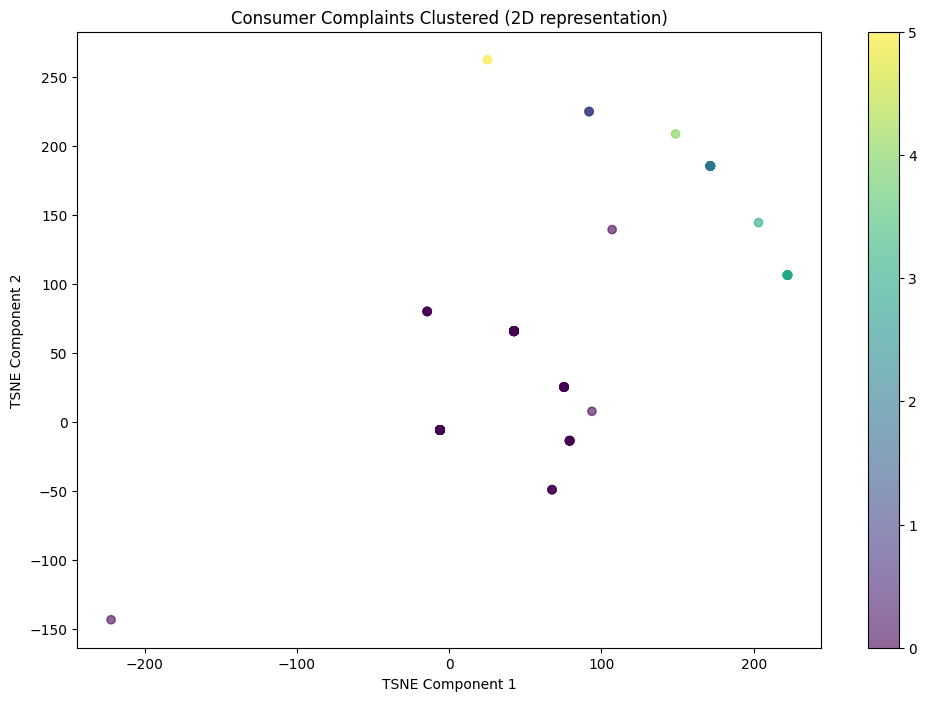

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# k-means for visualization
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)

# Assuming 'X' is the NumPy array containing your high-dimensional embeddings
# and 'clusters' contains the corresponding cluster labels

# Reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)


# Plotting the clusters in 2D
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('Consumer Complaints Clustered (2D representation)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

In [ ]:
def knn_comparison(data, k):
  X = vectorizer.fit_transform(cleaned_dataset['Consumer complaint narrative'])
  tsne = TSNE(n_components=2, random_state=42)
  X_reduced = tsne.fit_transform(X.toarray())

  Y = cleaned_dataset['Issue']
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_reduced,Y)

  # Plotting decision region
  plot_decision_regions(X_reduced, Y, clf=clf, legend=2)
  plt.show()
